# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [21]:
import numpy as np
import random
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

#Se comienza por importar todas las librerias que se utilizaran en el codigo 

In [40]:
#Se hacen las funciones de los ejes: x, y, z

def movimiento_b_x(pos, t, inter) :
    Xi = [1, -1]
    dt = np.sqrt(inter)
    Wi = [pos]
    for i in range(round(t/ inter)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi
#Se pasa la función mostrada arriba a codigo 

def movimiento_b_y (pos, t, inter) :
    Xi = [1, -1]
    dt = np.sqrt(inter)
    Wi = [pos]
    for i in range(round(t/inter)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi
#Se pasa la función mostrada arriba a codigo 

def movimiento_b_z(pos, t, inter) :
    Xi = [1, -1]
    dt = np.sqrt(inter)
    Wi = [pos]
    for i in range(round(t/inter)) :
        Wi.append(Wi[-1] + random.choice(Xi)*dt)
    return Wi
#Se pasa la función mostrada arriba a codigo 

x = movimiento_b_x(0, 10, 0.001)
y = movimiento_b_y(0, 10, 0.001)
z = movimiento_b_z(0, 10, 0.001)

#Se define el intervalo de tiempo que es de 10 seg, con un cambio en t de 0.001

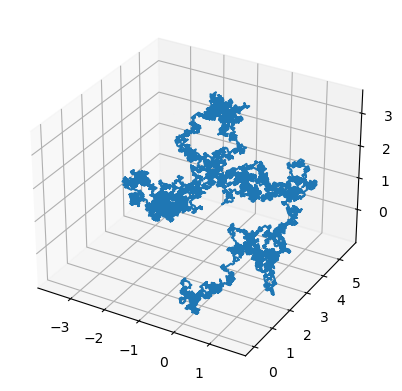

In [41]:
grafica_en_3D = plt.figure()
ejes_grafica = grafica_en_3D.add_subplot(111, projection='3d')

ejex = np.array([x])
ejey = np.array([y])
ejez = np.array([z])

ejes_grafica.plot_wireframe(ejex, ejey, ejez)

plt.show()

#Se procede a graficar 


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [42]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Se comienza por importar todas las librerias que se utilizaran en el codigo 

In [43]:
moneda = [-1, 1]

#Se define la variable moneda, donde -1 significa que perdio, mientras 1 significa que ganó

def apuesta() :
    capital_inicial = 20 
    Resultado = [capital_inicial]
    #Se establece el capital inicial en 20, y se define la variable resultado
    while Resultado[-1] > 0 :
        #Se crean los ciclos de repetición
        volado = random.choice(moneda)
        capital = Resultado[-1]
        if capital <= 0 :
            break
            #Se pone el break; no se porque, pero preguntando a mis compañeros me dijeron que ese era mi error 
        elif (volado == -1) and (capital >= 6) :
            capital = capital - (capital/2)
            Resultado.append(capital)
        elif (volado == 1) and (capital_inicial >= 6) :
            capital = capital + (capital/2)
            Resultado.append(capital)
        elif (volado == -1) and (capital < 6) :
            Resultado.append(capital - 2)
        elif (volado == 1) and (capital < 6) :
            Resultado.append(capital + 2)
            
            #Se definen las condiciones donde apostara la mitad del capital si tiene más de 6 pesos, por el contrario, si tiene menos solo se apostaran 2
    return Resultado

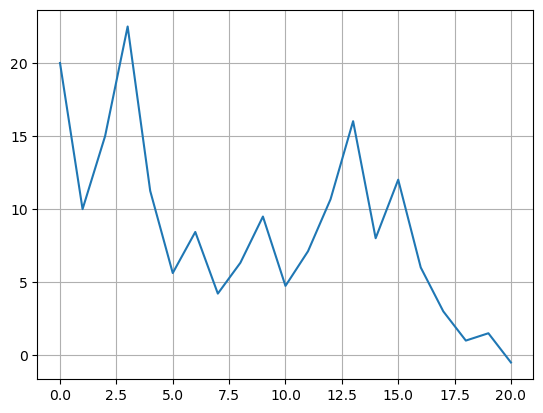

In [44]:
y = apuesta()
x = np.arange(0, len(y))

plt.figure()
plt.plot(x, y)
plt.grid()

#Se procede a graficar 

In [45]:
def apostador (n) :
    media = []
    for i in range(n) :
        media.append(len(apuesta())-1)
    return media
promedio = round(np.mean(apostador(10000)))
promedio 

#Se saca la media para determinar hasta donde se quedara el apostador sin dinero

22

(array([7.221e+03, 1.927e+03, 5.660e+02, 2.030e+02, 5.500e+01, 1.600e+01,
        9.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([  5. ,  26.3,  47.6,  68.9,  90.2, 111.5, 132.8, 154.1, 175.4,
        196.7, 218. ]),
 <BarContainer object of 10 artists>)

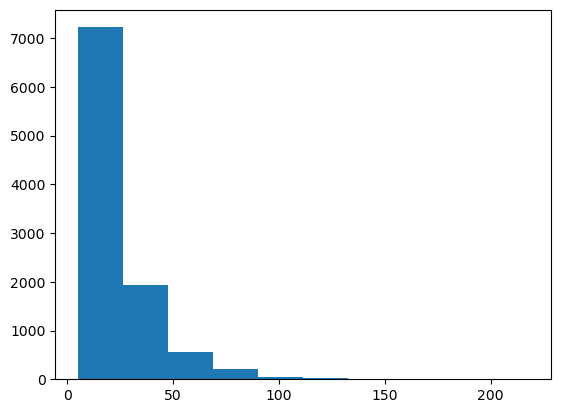

In [46]:
Proceso = np.array(apostador(10000))


plt.figure()
plt.hist(Proceso)

#Se procede a graficar 